In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=3)
%matplotlib inline

# Cruzamentos dos dados entre EJ, Mautic e Analytics.

## Relatório 1

In [169]:
# EJ(votos) + Mautic(contatos) + Dados gerais de Analytics
df2 = pd.read_csv('/tmp/airflow/votes_analytics_mautic.csv',dtype={'analytics_client_id': str})
df2['analytics_source'].fillna("empty", inplace=True)
df2['mautic_email'].fillna("empty", inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1188 non-null   int64 
 1   email                1188 non-null   object
 2   autor                1188 non-null   object
 3   autor_id             1188 non-null   int64 
 4   comentário           1188 non-null   object
 5   comentário_id        1188 non-null   int64 
 6   escolha              1188 non-null   object
 7   criado               1188 non-null   object
 8   analytics_client_id  1188 non-null   object
 9   mautic_email         1188 non-null   object
 10  mautic_first_name    169 non-null    object
 11  mautic_last_name     169 non-null    object
 12  analytics_source     1188 non-null   object
 13  analytics_medium     1127 non-null   object
 14  analytics_pageview   1127 non-null   object
 15  analytics_campaign   1127 non-null   object
dtypes: int

   # (1) Número de votos por canal (mtc_source)

Media de votos geral :1188


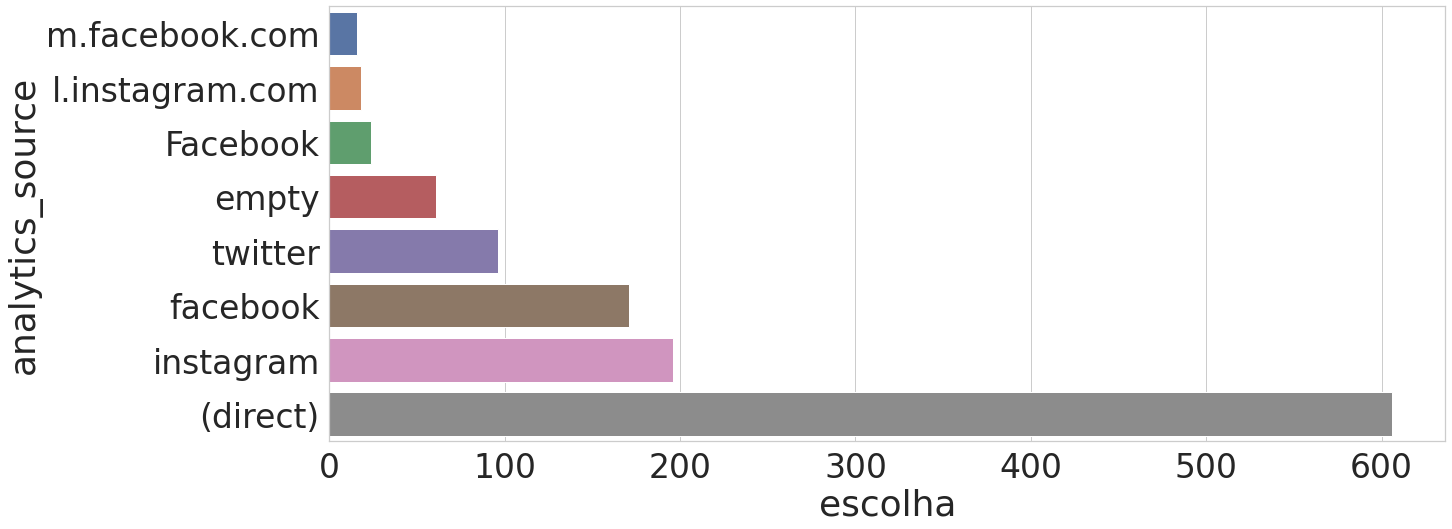

In [170]:
votes_by_channel_df = df2.groupby('analytics_source').count()
votes_by_channel_df.reset_index(inplace=True)
plt.figure(figsize=(20,8))
votes_by_channel_df.sort_values(by='escolha', inplace=True)
sns.set_style('whitegrid')
plot = sns.barplot(y='analytics_source', x='escolha', data=votes_by_channel_df)
print(f"Media de votos geral :{votes_by_channel_df['escolha'].sum()}")

### (2) Número de usuários únicos por canal (mtc_source)

Usuários únicos por canal com pelo menos um voto:74


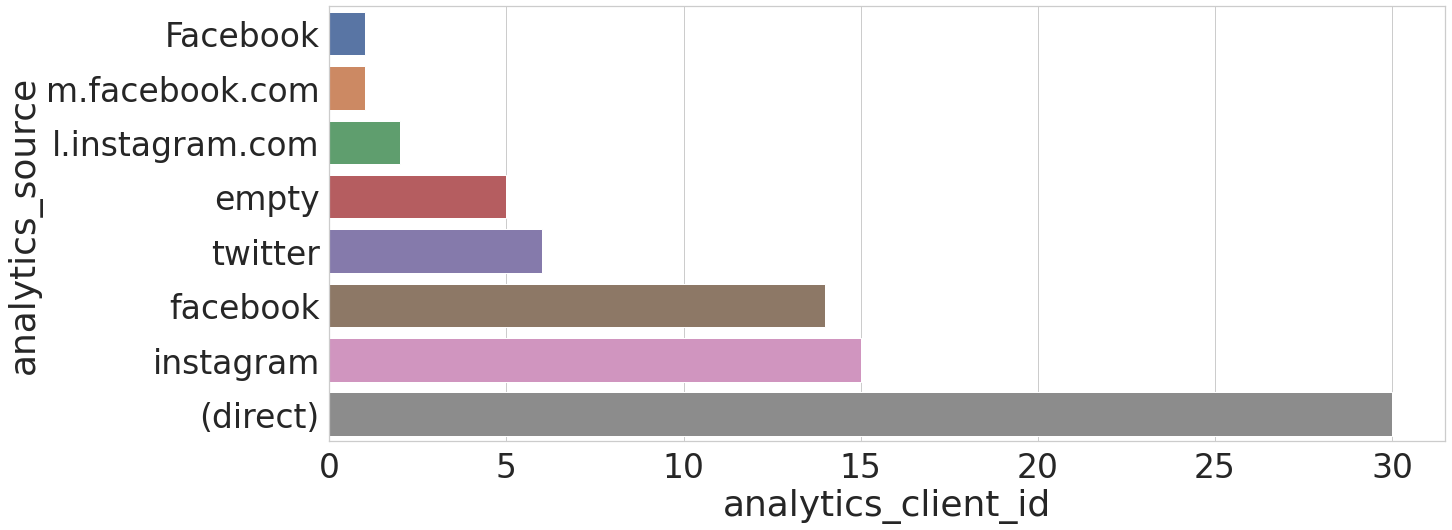

In [171]:
uniq_users_by_source_df = df2['analytics_source'].fillna("empty", inplace=True)
uniq_users_by_source_df = df2.groupby(['analytics_source']).nunique()
uniq_users_by_source_df.drop('analytics_source', axis=1, inplace=True)
uniq_users_by_source_df.reset_index(inplace=True)
plt.figure(figsize=(20,8))
uniq_users_by_source_df.sort_values(by='analytics_client_id', inplace=True)
sns.set_style('whitegrid')
sns.barplot(y='analytics_source', x='analytics_client_id', data=uniq_users_by_source_df)
print(f"Usuários únicos por canal com pelo menos um voto:{uniq_users_by_source_df['analytics_client_id'].sum()}")

### (3) TOP 10 usuários votantes

In [172]:
## HEADER
tmp = df2.groupby(['analytics_client_id', 'mautic_email']).count().reset_index(level=0).reset_index(level=0)
top_10_voters_df = pd.DataFrame(tmp, columns=['analytics_client_id', 'criado', 'mautic_email']) 
top_10_voters_df.rename(columns={'criado': 'votos'}, inplace=True)
top_10_voters_df.sort_values(by='votos', inplace=True, ascending=False)
top_10_voters_df.head(10)

,analytics_client_id,votos,mautic_email
39,1903063144.1588463463,32,empty
12,1410091569.1589256160,32,empty
43,1989578898.1588345417,31,empty
32,1767700127.1588367771,31,empty
59,707828180.1588364694,31,vanderlei_oliveiradossantos@yahoo.com.br
40,1907336411.1588286903,24,empty
30,1746903803.1530455546,24,empty
25,1667238980.1581114839,24,siul.prado.lcdp@gmail.com
49,397769184.1587727960,24,lais.dutravargas@yahoo.com.br
50,397891220.1587692065,24,empty


## (4) número de usuários com pelo menos 1 voto no período de 17 a 23/abril

In [173]:
from dateutil.parser import *
from dateutil.tz import *
import datetime
first_day = datetime.datetime(2020, 4, 17, tzinfo=tzlocal())
last_day = datetime.datetime(2020, 4, 23, tzinfo=tzlocal())
result = df2[df2['criado'].map(lambda x: parse(x) >= first_day and parse(x) <= last_day )]
len(result['analytics_client_id'].value_counts())

1

## (5) número de usuários com pelo menos 1 voto no período de 24 a 26/abril

In [174]:
first_day = datetime.datetime(2020, 4, 24, tzinfo=tzlocal())
last_day = datetime.datetime(2020, 4, 26, tzinfo=tzlocal())
result = df2[df2['criado'].map(lambda x: parse(x) >= first_day and parse(x) <= last_day )]
votes_before_first_day = df2[df2['criado'].map(lambda x: parse(x) < first_day )]
print(f"Número de usuários com pelo menos 1 voto: {len(result['analytics_client_id'].value_counts())}")
result2 = len(result['analytics_client_id'].value_counts()) - len(votes_before_first_day[votes_before_first_day['analytics_client_id'].map(lambda x: x in result['analytics_client_id'])])
print(f"Usuários sem voto antes do dia 24: {result2}")
result

Número de usuários com pelo menos 1 voto: 3
Usuários sem voto antes do dia 24: 3


,Unnamed: 0,email,autor,autor_id,comentário,comentário_id,escolha,criado,analytics_client_id,mautic_email,mautic_first_name,mautic_last_name,analytics_source,analytics_medium,analytics_pageview,analytics_campaign
6,6,983577-mautic@mail.com,983577-mautic__mail.com,1169,Acho que a Lei de Abuso de Autoridade é uma mo...,669,agree,2020-04-24T15:41:29.406Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
7,7,983577-mautic@mail.com,983577-mautic__mail.com,1169,"Não tenho conhecimento da lei,mas acredito que...",728,skip,2020-04-24T15:42:44.816Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
8,8,983577-mautic@mail.com,983577-mautic__mail.com,1169,É preciso muito cuidado com a Lei de Abuso de ...,670,agree,2020-04-24T15:43:02.630Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
9,9,983577-mautic@mail.com,983577-mautic__mail.com,1169,O Caixa 2 é crime e muda o resultado das eleiç...,668,agree,2020-04-24T15:48:28.271Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
10,10,983577-mautic@mail.com,983577-mautic__mail.com,1169,Aumentar a pena para casos de corrupção e exig...,673,agree,2020-04-24T15:48:41.542Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
11,11,983577-mautic@mail.com,983577-mautic__mail.com,1169,Tornar o Caixa 2 crime ajudará a evitar essa p...,667,agree,2020-04-24T15:48:58.491Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
12,12,983577-mautic@mail.com,983577-mautic__mail.com,1169,Só poderemos endurecer as penas em casos de co...,674,disagree,2020-04-24T15:51:33.780Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
13,13,983577-mautic@mail.com,983577-mautic__mail.com,1169,"Ninguém pode ficar acima da Lei! Por isso, é p...",671,agree,2020-04-24T15:51:47.941Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
14,14,983577-mautic@mail.com,983577-mautic__mail.com,1169,Caixa 2 tem que ser crime sim! Se não punir os...,666,agree,2020-04-24T15:51:56.941Z,1220828086.1588292433,empty,NaN,NaN,empty,NaN,NaN,NaN
15,15,182111-mautic@mail.com,182111-mautic__mail.com,1170,"Não tenho conhecimento da lei,mas acredito que...",728,agree,2020-04-24T16:19:45.576Z,397769184.1587727960,lais.dutravargas@yahoo.com.br,Lais,Dutra Vargas,Facebook,Unidos Contra a Corrupção,/opiniao/,Cadastre-se


## (6) número de usuários com pelo menos 1 voto no período de 27/abril a 14/maio com UTM_campaign vazio

In [175]:
first_day = datetime.datetime(2020, 4, 27, tzinfo=tzlocal())
last_day = datetime.datetime(2020, 5, 14, tzinfo=tzlocal())
df_by_interval = df2[df2['criado'].map(lambda x: parse(x) >= first_day and parse(x) <= last_day )]
result = df_by_interval[(df_by_interval['analytics_campaign'] == '(not set)') | (df_by_interval['analytics_campaign'] == np.nan)]

votes_before_first_day = df2[df2['criado'].map(lambda x: parse(x) < first_day )]
print(f"Número de usuários com pelo menos 1 voto entre 27/abril e 14/maio: {len(result['analytics_client_id'].value_counts())}")
result2 = len(votes_before_first_day[votes_before_first_day['analytics_client_id'].map(lambda x: x in result['analytics_client_id'])])
print(f"Dos usuários que votaram a partir do dia 27, quantos votaram antes do dia 26: {result2}")

Número de usuários com pelo menos 1 voto entre 27/abril e 14/maio: 31
Dos usuários que votaram a partir do dia 27, quantos votaram antes do dia 26: 0


## (7) número de usuários com pelo menos 1 voto a partir de 28/abril com UTM_campaign = "datafolha28abril" e UTM_campaign = "bio"

In [176]:
first_day = datetime.datetime(2020, 4, 28, tzinfo=tzlocal())
df_by_campaign = df2[(df2['analytics_campaign'] == 'datafolha28abril') | (df2['analytics_campaign'] == 'bio')]
df_by_campaign_by_date = df_by_campaign[df_by_campaign['criado'].map(lambda x: parse(x) >= first_day)]
len(df_by_campaign_by_date['analytics_client_id'].value_counts())

votes_before_first_day = df2[df2['criado'].map(lambda x: parse(x) < first_day )]
print(f"Número de usuários com pelo menos 1 voto a partir do dia 28 de abril: {len(result['analytics_client_id'].value_counts())}")

Número de usuários com pelo menos 1 voto a partir do dia 28 de abril: 31


## (8) número de usuários com pelo menos 1 voto no período de 28/abril a 01/maio com UTM_campaign vazio

In [177]:
first_day = datetime.datetime(2020, 4, 28, tzinfo=tzlocal())
last_day = datetime.datetime(2020, 5, 1, tzinfo=tzlocal())
df_by_interval = df2[df2['criado'].map(lambda x: parse(x) >= first_day and parse(x) <= last_day )]
result = df_by_interval[(df_by_interval['analytics_campaign'] == '(not set)') | (df_by_interval['analytics_campaign'] == np.nan)]
print(f"Número de usuários com pelo menos 1 voto entre 28/abril e 01/maio: {len(df_by_campaign_by_date['analytics_client_id'].value_counts())}")

Número de usuários com pelo menos 1 voto entre 28/abril e 01/maio: 32


## dos conjuntos de usuários dos ítens (7) e (8) somados, quantos usuários não tinham votado nenhuma vez antes

In [178]:
first_day = datetime.datetime(2020, 4, 28, tzinfo=tzlocal())
last_day = datetime.datetime(2020, 5, 1, tzinfo=tzlocal())
df_by_interval = df2[df2['criado'].map(lambda x: parse(x) >= first_day and parse(x) <= last_day )]
result = df_by_interval[(df_by_interval['analytics_campaign'] == '(not set)') | (df_by_interval['analytics_campaign'] == np.nan) | (df2['analytics_campaign'] == 'datafolha28abril') | (df2['analytics_campaign'] == 'bio')]

votes_before_first_day = df2[df2['criado'].map(lambda x: parse(x) < first_day )]
print(f"Número de usuários com pelo menos 1 voto entre 28/abril e 1/maio: {len(result['analytics_client_id'].value_counts())}")
result2 = len(votes_before_first_day[votes_before_first_day['analytics_client_id'].map(lambda x: x in result['analytics_client_id'])])
print(f"Dos usuários que votaram a partir do dia 28, quantos votaram antes do dia 28: {result2}")

Número de usuários com pelo menos 1 voto entre 28/abril e 1/maio: 45
Dos usuários que votaram a partir do dia 28, quantos votaram antes do dia 28: 0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


## (9) número de usuários com pelo menos 1 voto a partir de 8/maio com UTM_campaign = "chapecó8maio"

In [179]:
first_day = datetime.datetime(2020, 5, 8, tzinfo=tzlocal())
df_by_campaign = df2[(df2['analytics_campaign'] == 'chapecó8maio')]
df_by_campaign_by_date = df_by_campaign[df_by_campaign['criado'].map(lambda x: parse(x) >= first_day)]
len(df_by_campaign_by_date['analytics_client_id'].value_counts())

1

## Comentarios

In [180]:
df3 = pd.read_csv('/tmp/airflow/comments_analytics_mautic.csv',dtype={'analytics_client_id': str})
df3

,Unnamed: 0,comentário,comentário_id,autor,autor_id,concorda,discorda,pulados,convergência,participação,criado,analytics_client_id,mautic_email,mautic_first_name,mautic_last_name,analytics_source,analytics_medium,analytics_pageview,analytics_campaign
0,0,"Tais pessoas devem ter um limite, pois o fruto...",731,983577-mautic@mail.com,1169,0.807692,0.102564,0.089744,0.774648,0.537931,2020-04-24T15:47:58.205Z,1220828086.1588292433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Precisamos de sistemas de transparência e de f...,732,983577-mautic@mail.com,1169,0.973684,0.026316,0.000000,0.947368,0.524138,2020-04-24T15:50:57.713Z,1220828086.1588292433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Infelizmente, o legislativo já garantiu legali...",733,182111-mautic@mail.com,1170,0.474359,0.384615,0.141026,0.104478,0.537931,2020-04-24T16:38:26.544Z,397769184.1587727960,lais.dutravargas@yahoo.com.br,Lais,Dutra Vargas,NaN,NaN,NaN,NaN
3,3,A autonomia da Polícia Federal é importante pa...,737,1010997-mautic@mail.com,1210,0.974359,0.025641,0.000000,0.948718,0.268966,2020-04-28T22:32:33.086Z,521232676.1588112747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Não precisa esperar pra endurecer as penas. De...,738,1011032-mautic@mail.com,1219,0.860465,0.069767,0.069767,0.850000,0.296552,2020-04-28T23:15:45.527Z,1793740492.1588115418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,"Acredito sim na cura, o caminho é transparênci...",739,1011038-mautic@mail.com,1221,0.909091,0.045455,0.045455,0.904762,0.303448,2020-04-28T23:18:35.638Z,1450541527.1588115662,NaN,NaN,NaN,instagram,ejpost,/opiniao/,bio
6,6,Essa questão já apareceu. Acredito SIM que a c...,740,1011038-mautic@mail.com,1221,0.909091,0.045455,0.045455,0.904762,0.303448,2020-04-28T23:21:02.382Z,1450541527.1588115662,NaN,NaN,NaN,instagram,ejpost,/opiniao/,bio
7,7,É preciso aplicar leis e punições severas. Se ...,742,1011144-mautic@mail.com,1238,0.923077,0.051282,0.025641,0.894737,0.268966,2020-04-29T02:14:10.257Z,467563951.1588125919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,O compliance corporativo é fundamental para a ...,743,994697-mautic@mail.com,1251,0.837838,0.027027,0.135135,0.937500,0.255172,2020-04-29T13:02:01.825Z,160992093.1588177077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,"A corrupção, em si mesma, não tem cura. No ent...",744,994697-mautic@mail.com,1251,0.897436,0.102564,0.000000,0.794872,0.268966,2020-04-29T13:04:08.635Z,160992093.1588177077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
